<a href="https://colab.research.google.com/github/Girij1718/Predicting-Diabetes-Risk-Using-Health-and-Lifestyle-Indicators/blob/main/Final_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

#handling class imbalance
from imblearn.over_sampling import SMOTE


In [3]:

# Load the dataset
file_path = "/content/drive/MyDrive/diabetes_data_upload.csv"
df=pd.read_csv(file_path)
print("Data Loaded Successfully!")
df.head()

Data Loaded Successfully!


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
# Data Cleaning & Preprocessing
df.info()

# Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [5]:
# Convert Categorical to Numeric (Label Encoding)
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [6]:
#Feature and Target separation
x = df.drop('class' , axis= 1)
y = df['class']

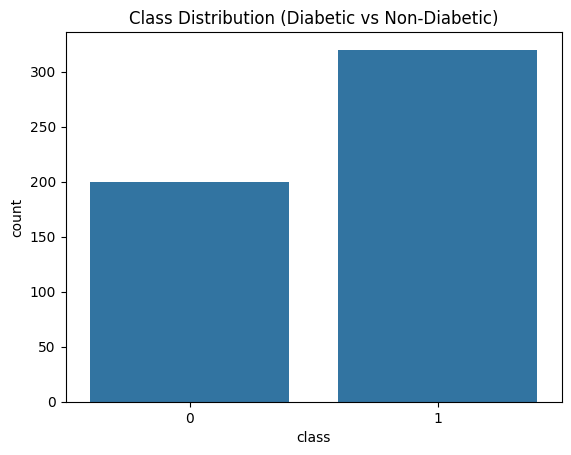

In [7]:
#Exploratory Data Analysis (EDA)
sns.countplot(x='class', data=df)
plt.title("Class Distribution (Diabetic vs Non-Diabetic)")
plt.show()

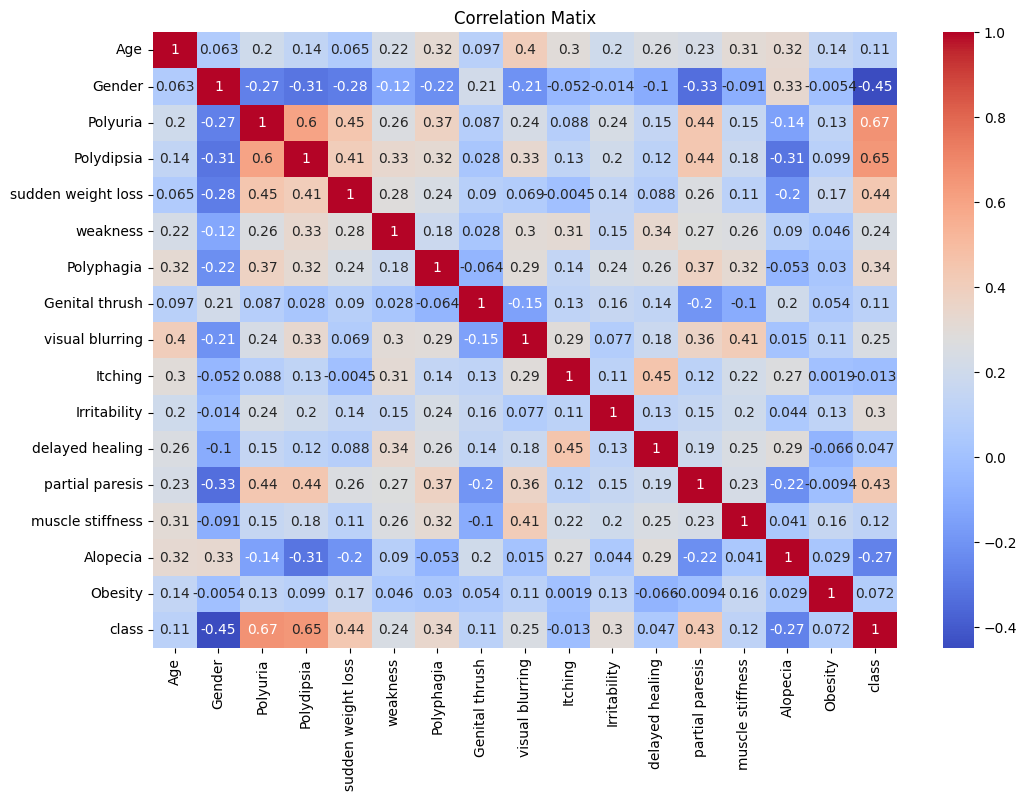

In [8]:
#correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matix")
plt.show()

In [9]:
# Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Standardization
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [10]:
#Handling class imbalance
sm = SMOTE(random_state=42)
x_train , y_train = sm.fit_resample(x_train , y_train)

In [11]:
#import cross_val_score from sklearn to perform cross validation and evaluate model performance

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [12]:
#For Logistic Regression

model = LogisticRegression(max_iter=1000)

# Evaluate using cross-validation
scores = cross_val_score(model, x, y, cv=5)
print("Logistic Regression CV scores:", scores)
print("Mean Accuracy:", scores.mean())
import numpy as np

scores = np.array([0.8942, 0.9423, 0.8750, 0.9711, 0.9519])
std_dev = np.std(scores)
print("Standard Deviation:", std_dev)



Logistic Regression CV scores: [0.89423077 0.93269231 0.875      0.97115385 0.95192308]
Mean Accuracy: 0.925
Standard Deviation: 0.03627313055141504


In [13]:
#For SVM

svm_model = SVC(kernel='rbf', C=1, gamma='scale')

# Evaluate using cross-validation
svm_scores = cross_val_score(svm_model, x, y, cv=5)

print("SVM CV Scores:", svm_scores)
print("SVM Mean Accuracy:", svm_scores.mean())
print("SVM Score Std Dev:", svm_scores.std())

SVM CV Scores: [0.61538462 0.61538462 0.61538462 0.61538462 0.61538462]
SVM Mean Accuracy: 0.6153846153846154
SVM Score Std Dev: 0.0


In [14]:
#For Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Evaluate using cross-validation
rf_scores = cross_val_score(rf_model, x, y, cv=5)

print("Random Forest CV Scores:", rf_scores)
print("RF Mean Accuracy:", rf_scores.mean())
print("RF Score Std Dev:", rf_scores.std())


Random Forest CV Scores: [0.95192308 0.99038462 0.93269231 1.         1.        ]
RF Mean Accuracy: 0.975
RF Score Std Dev: 0.027601346335398704


In [15]:
#Compare All Models
print(f"LogReg Mean: {scores.mean():.4f} | Std: {scores.std():.4f}")
print(f"SVM    Mean: {svm_scores.mean():.4f} | Std: {svm_scores.std():.4f}")
print(f"RF     Mean: {rf_scores.mean():.4f} | Std: {rf_scores.std():.4f}")


LogReg Mean: 0.9269 | Std: 0.0363
SVM    Mean: 0.6154 | Std: 0.0000
RF     Mean: 0.9750 | Std: 0.0276


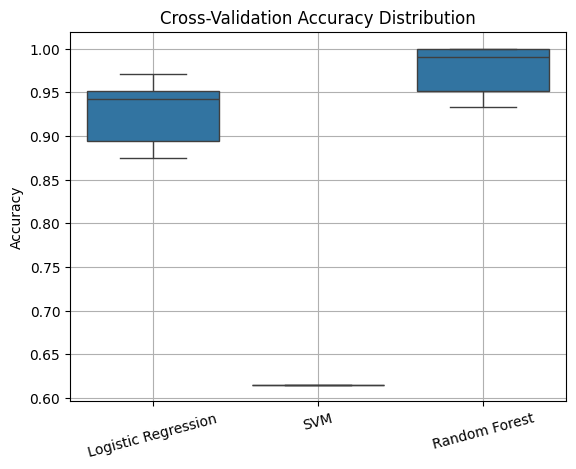

In [16]:
# Boxplot of Cross-Validation Scores

models = ['Logistic Regression'] * 5 + ['SVM'] * 5 + ['Random Forest'] * 5
scores_combined = list(scores) + list(svm_scores) + list(rf_scores)

sns.boxplot(x=models, y=scores_combined)
plt.title('Cross-Validation Accuracy Distribution')
plt.ylabel('Accuracy')
plt.xticks(rotation=15)
plt.grid(True)
plt.show()


/tmp/ipython-input-3613841201.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=models, y=scores_combined, jitter=True, palette='Set2')


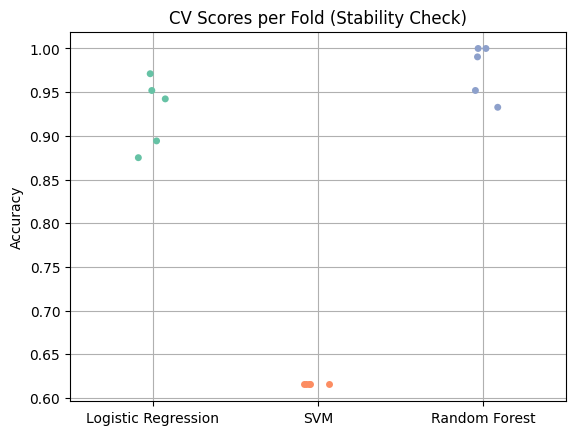

In [17]:
#Strip Plot

sns.stripplot(x=models, y=scores_combined, jitter=True, palette='Set2')
plt.title('CV Scores per Fold (Stability Check)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


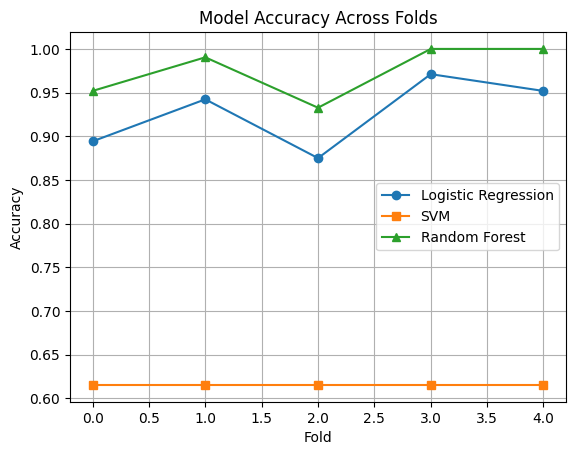

In [18]:
#Line Plot

plt.plot(scores, marker='o', label='Logistic Regression')
plt.plot(svm_scores, marker='s', label='SVM')
plt.plot(rf_scores, marker='^', label='Random Forest')
plt.title("Model Accuracy Across Folds")
plt.xlabel("Fold")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
#library For Hyperparameter Tuning
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold , GridSearchCV
from sklearn.svm import SVC


In [20]:
#Logistic Regression with Hyperparameter Tuning
logreg = LogisticRegression(max_iter=1000, solver='liblinear')
logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)
y_proba_logreg = logreg.predict_proba(x_test)[:, 1]

print("Logistic Regression")
print(classification_report(y_test, y_pred_logreg))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_logreg))


Logistic Regression
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        33
           1       0.97      0.96      0.96        71

    accuracy                           0.95       104
   macro avg       0.94      0.95      0.94       104
weighted avg       0.95      0.95      0.95       104

ROC-AUC: 0.9748186086214256


In [21]:
#SVM with Hyperparameter Tuning

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=cv, n_jobs=-1)
svm_grid.fit(x_train, y_train)
best_svm = svm_grid.best_estimator_

y_pred_svm = best_svm.predict(x_test)
y_proba_svm = best_svm.predict_proba(x_test)[:, 1]

print("SVM")
print("Best Parameters:", svm_grid.best_params_)
print(classification_report(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_svm))

SVM
Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        33
           1       0.99      0.99      0.99        71

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104

ROC-AUC: 0.9940247545881349


In [22]:
#Random Forest with Hyperparameter Tuning
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=cv, n_jobs=-1)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_

y_pred_rf = best_rf.predict(x_test)
y_proba_rf = best_rf.predict_proba(x_test)[:, 1]

print("Random Forest")
print("Best Parameters:", rf_grid.best_params_)
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_proba_rf))


Random Forest
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.97      0.99      0.98        71

    accuracy                           0.97       104
   macro avg       0.97      0.96      0.97       104
weighted avg       0.97      0.97      0.97       104

ROC-AUC: 0.9991463935125907


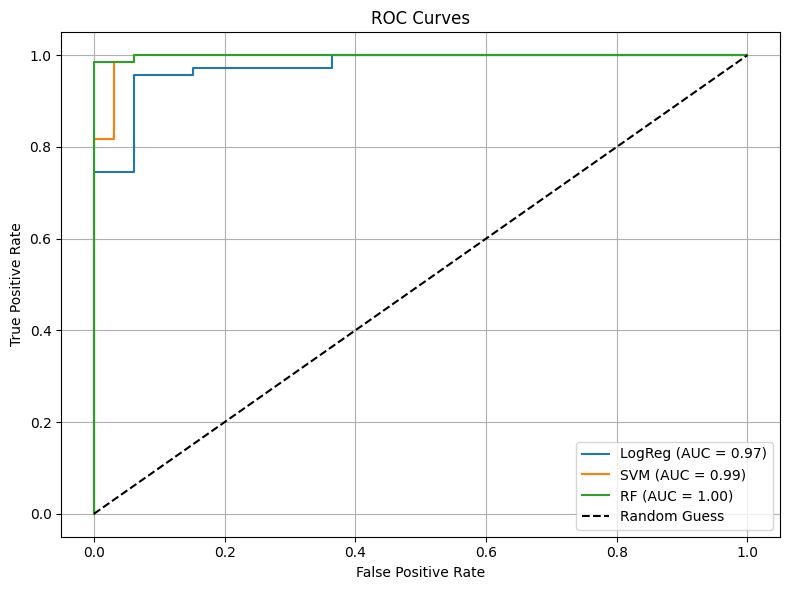

In [23]:
#ROC Curves
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_proba_logreg)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'LogReg (AUC = {roc_auc_score(y_test, y_proba_logreg):.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_score(y_test, y_proba_svm):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'RF (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


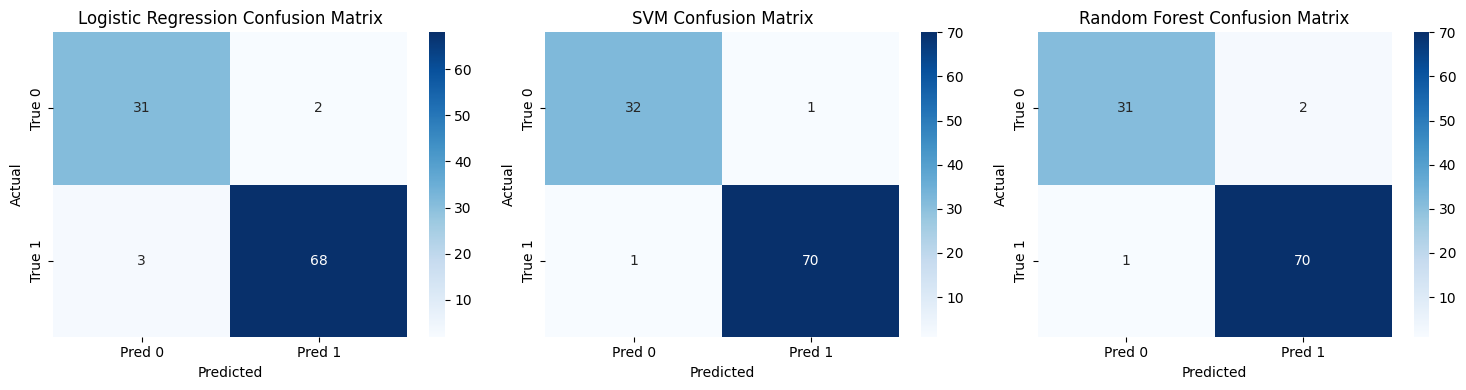

In [24]:
#Plot Confusion Matrices
models = {
    "Logistic Regression": y_pred_logreg,
    "SVM": y_pred_svm,
    "Random Forest": y_pred_rf
}

plt.figure(figsize=(15, 4))
for i, (name, preds) in enumerate(models.items()):
    cm = confusion_matrix(y_test, preds)
    plt.subplot(1, 3, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Pred 0', 'Pred 1'], yticklabels=['True 0', 'True 1'])
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()
